In [1]:
from scipy import ndimage, datasets
import matplotlib.pyplot as plt
import numpy as np

def to1D(coordinates,dimensions):
  x,y,z=coordinates
  xMax,yMax,zMax=dimensions
  return (z * xMax * yMax) + (y * xMax) + x

def to3D(index,dimensions):
    xMax,yMax,zMax=dimensions
    z = index // (xMax * yMax)
    index -= (z * xMax * yMax)
    y = index // xMax
    x = index % xMax
    return x, y, z 

In [2]:
dim = [150,150,150]
side_length = 80
dX,dY,dZ = dim
positions_world = [(np.array([(i+0.5)/dX,(j+0.5)/dY,(k+0.5)/dZ]))*side_length-side_length/2 * np.array([1,1,0])
                   for k in range(dX) for j in range(dY) for i in range(dZ)]

In [3]:
def square_phantom(r0,l,dim,positions):
    '''
    Parameters: 
        r0 is the center of the sphere relative to origin which is assumed to be in the middle.
        l the sidelength of the square
        N is the number of voxels along one dimension, it is the same for the remaining two. 
    Returns: 
        numpy.array with shape (N,N,N) with 0 or 1 in each element. 1 if that voxel is contained within the sphere, 0 otherwise.
    '''
    dX,dY,dX = dim
    out = np.zeros((dX,dY,dZ))
    
    for i in range(dX):
        for j in range(dY):
            for k in range(dZ):
                n = to1D([i,j,k],dim)
                [x,y,z] = positions[n]
                x = -x
                if np.abs(x-r0[0])**2+np.abs(y-r0[1])**2 + np.abs(z-r0[2])**2 <l**2:
                    out[i][j][k] = 1

    return out

In [4]:
r0 = [-20,0,10]
l = 10

pixel_length = side_length/dim[0]

z_height = int(r0[2]/pixel_length)
pixel_cube_Z_start = int( z_height - 1)
pixel_cube_Z_end = int( z_height -1 + 2*l/pixel_length + 1)

world = square_phantom(r0,l,dim,positions_world)
slice = np.array(world[:,:,int( (pixel_cube_Z_end-pixel_cube_Z_start)/2 )])

world = ndimage.rotate(world, 45, reshape=False)
slice_rot1 = np.array(world[:,:,int( (pixel_cube_Z_end-pixel_cube_Z_start)/2 )])
world = ndimage.rotate(world, 45, reshape=False)
slice_rot2 = np.array(world[:,:,int( (pixel_cube_Z_end-pixel_cube_Z_start)/2 )])
world = ndimage.rotate(world, 45, reshape=False)
slice_rot3 = np.array(world[:,:,int( (pixel_cube_Z_end-pixel_cube_Z_start)/2 )])


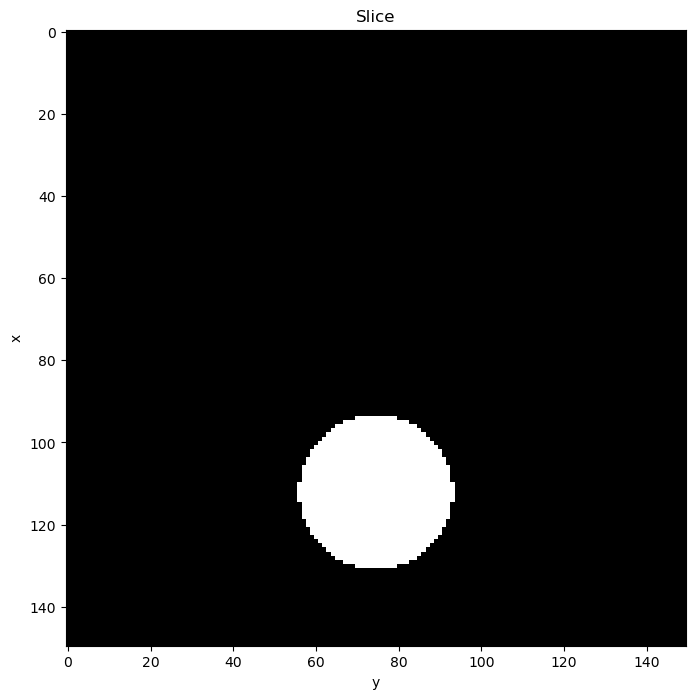

In [5]:
image = slice
fig, ax1 = plt.subplots(1, 1, figsize=(8, 8))
ax1.set_xlabel("y")
ax1.set_ylabel("x")
ax1.set_title("Slice")
ax1.imshow(
    image,
    cmap=plt.cm.Greys_r,
    aspect='auto'#,
    #extent =[-49.5,49.5, -49.5, 49.5]
)

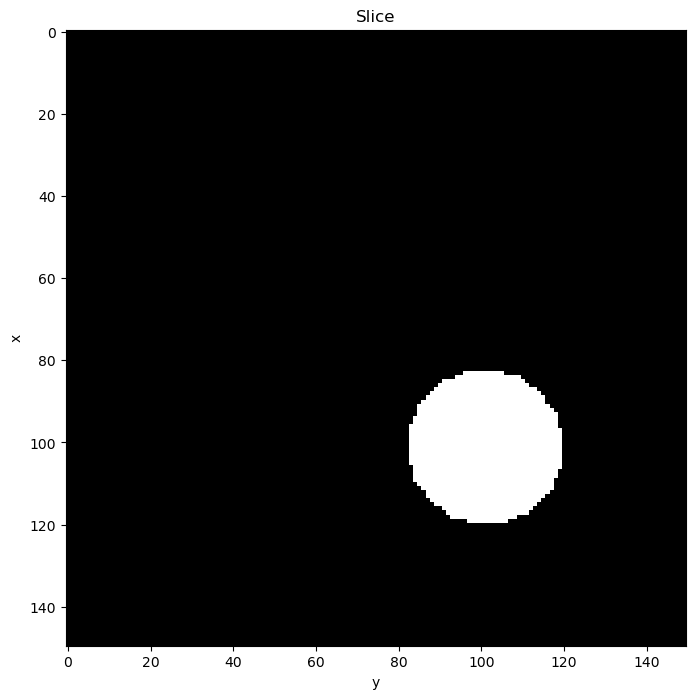

In [17]:
slice_rot1[slice_rot1>0.5] = 1
slice_rot1[slice_rot1<0.5] = 0

image = slice_rot1
fig, ax1 = plt.subplots(1, 1, figsize=(8, 8))
ax1.set_xlabel("y")
ax1.set_ylabel("x")
ax1.set_title("Slice")
ax1.imshow(
    image,
    cmap=plt.cm.Greys_r,
    aspect='auto'#,
    #extent =[-49.5,49.5, -49.5, 49.5]
)